In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

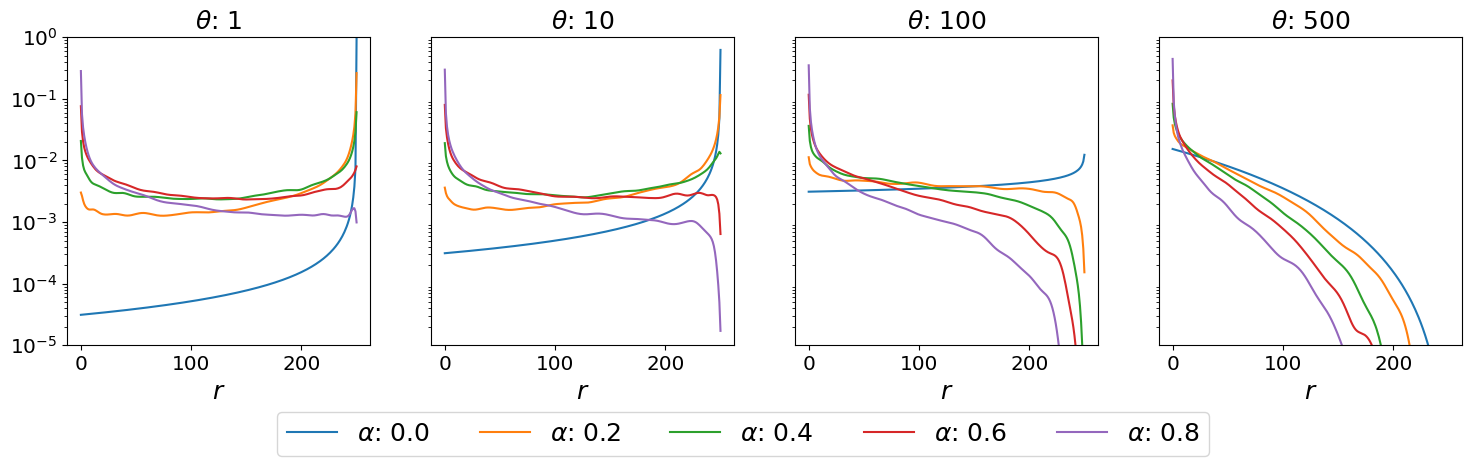

In [ ]:
df = pd.read_csv("../results/smooth_comparison.csv")

fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
thetas = [1, 10, 100, 500]
alphas = [0.0, 0.2, 0.4, 0.6, 0.8]

for i, r in enumerate(range(0, len(thetas) * len(alphas), len(alphas))):
    vals = df.values[r:r+len(alphas), :]
    for j in range(len(alphas)):
        axis[i].plot(np.exp(vals[j, :]), label=r"$\alpha$: {0}".format(alphas[j]))
    axis[i].set_yscale("log")
    axis[i].set_title(r"$\theta$: {0}".format(thetas[i]), fontsize=18)
    axis[i].set_ylim(1e-5, 1)
    
for i in range(4):
    axis[i].set_xlabel(r"$r$", fontsize=18)
    
for i in range(1, 4):
    axis[i].set_yticks([])

axis[2].legend(fontsize=18, ncol=len(alphas), loc="lower left", bbox_to_anchor=(-1.75, -0.4))

plt.savefig("../plots/smoothing_comparison.pdf", bbox_inches="tight")

In [ ]:
vals.shape

# Frequency One Hash

In [4]:
df = pd.read_csv("../results/frequency_simulation_results.csv")
df = df[df.Model.isin(["DP", "NGG", "PY"])]

In [5]:
df

,"(0, 1]","(1, 4]","(4, 16]","(16, 64]","(64, 256]","(256, Inf]",DataGen,Params,Model,repnum
0,33.798401,NaN,34.792641,0.798401,4.201599,114.891990,py,"[1.0, 0.0]",DP,9
2,24.537119,NaN,25.266751,8.462881,26.551587,5392.922927,py,"[1.0, 0.0]",NGG,9
3,52.335645,97.700291,558.159004,2900.093305,1844.857405,802.796527,py,"[1.0, 0.25]",DP,9
5,29.107000,54.030131,310.517448,1619.266193,977.367229,3772.865299,py,"[1.0, 0.25]",NGG,9
6,567.951338,558.379588,718.833965,1084.722695,2818.422190,3355.266732,py,"[1.0, 0.5]",DP,9
...,...,...,...,...,...,...,...,...,...,...
593,893.434344,833.802665,215.772604,353.480248,1225.131707,2954.037915,zipf,1.6,NGG,2
594,672.531786,3091.068621,513.090626,321.801731,1237.068114,1963.628255,zipf,1.9,DP,2
596,705.021294,3240.296749,538.264863,338.976786,1302.880786,1824.711593,zipf,1.9,NGG,2
597,956.272971,505.369133,271.950137,858.077862,1464.424462,705.765641,zipf,2.2,DP,2


# Experiment 1 ( Section 5.2 )

## Figure 2

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/3825013137.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  curr_df = curr_df.groupby(["Params", "Model"]).median().reset_index()
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/3825013137.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  curr_df = curr_df.groupby(["Params", "Model"]).median().reset_index()


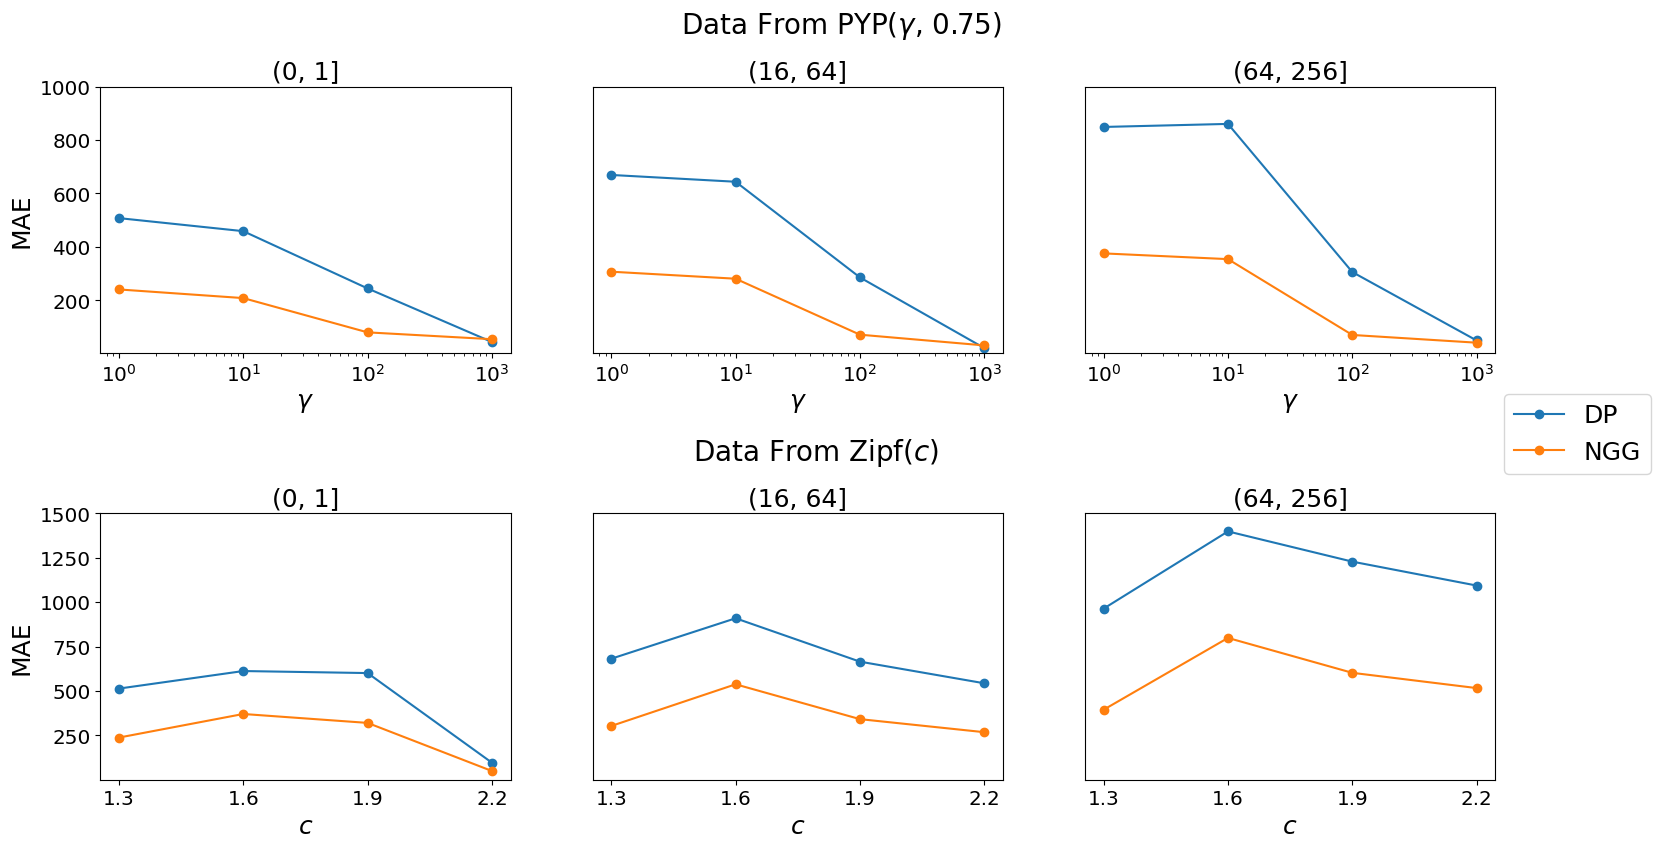

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
kept_cols = [3, 6, 7]

df = pd.read_csv("../results/frequency_simulation_results.csv")
df = df[df.Model.isin(["DP", "NGG"])]
curr_df = df[df.DataGen == "py"]

alpha = 0.75

curr_df = df[df.DataGen == "py"]
    
p_list = ["[{0}, {1}]".format(a, alpha) for a in [1.0, 10.0, 100.0, 1000.0]]
curr_df = curr_df[curr_df.Params.isin(p_list)]
curr_df = curr_df.groupby(["Params", "Model"]).median().reset_index()
curr_df["theta"] = [x[0] for x in curr_df.Params.apply(json.loads)]

for model in ["DP", "NGG"]:
    mdf = curr_df[curr_df["Model"] == model]
    for i, col_idx in enumerate(kept_cols):
        axis[0][i].plot(mdf.theta, mdf[mdf.columns[col_idx]], "-o", label=model)
        axis[0][i].set_title(mdf.columns[col_idx], fontsize=18)
        axis[0][i].set_xscale("log")
        # axis[i].set_yscale("log")
        axis[0][i].set_ylim(1, 1000)

for i in range(3):
    axis[0][i].set_xlabel(r"$\gamma$", fontsize=18)
    axis[0][i].set_xticks(mdf.theta)
    
for i in range(1, 3):
    axis[0][i].set_yticks([])


curr_df = df[df.DataGen == "zipf"]
curr_df = curr_df.groupby(["Params", "Model"]).median().reset_index()


for model in ["DP", "NGG"]:
    mdf = curr_df[curr_df["Model"] == model]
    for i, col_idx in enumerate(kept_cols):
        axis[1][i].plot(mdf.Params, mdf[mdf.columns[col_idx]], "-o", label=model)
        axis[1][i].set_title(mdf.columns[col_idx], fontsize=18)
        axis[1][i].set_ylim(1, 1500)

for i in range(3):
    axis[1][i].set_xlabel(r"$c$", fontsize=18)

for i in range(1, 3):
    axis[1][i].set_yticks([])
    axis[1][i].set_xticks(mdf.Params)


plt.subplots_adjust(hspace=0.6)

axis[0][0].set_ylabel("MAE", fontsize=18)
axis[1][0].set_ylabel("MAE", fontsize=18)


plt.text(-3.3, 1800, r"Data From Zipf($c$)", fontsize=20)
plt.text(-3.4, 4200, r"Data From PYP($\gamma$, 0.75)", fontsize=20)

axis[0][2].legend(loc="lower center", bbox_to_anchor=(1.2, -0.5), fontsize=18)
# plt.savefig("../plots/fig2.pdf")

## Table 1

In [28]:
med_df = df[df.DataGen == "py"].groupby(["DataGen", "Params", "Model"]).median().reset_index()
med_df["theta"] = [x[0] for x in med_df.Params.apply(json.loads)]
med_df["alpha"] = [x[1] for x in med_df.Params.apply(json.loads)]
med_df = med_df.drop(["DataGen", "repnum", "Params"], axis=1)
columns = ["theta", "alpha", "Model", "(0, 1]", "(1, 4]", "(4, 16]", "(16, 64]", "(64, 256]", "(256, Inf]"]
med_df = med_df[columns]
print(med_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrlrrrrrr}
\toprule
  theta &  alpha & Model &  (0, 1] &  (1, 4] &  (4, 16] &  (16, 64] &  (64, 256] &  (256, Inf] \\
\midrule
   1.00 &   0.00 &    DP &   24.85 &    4.46 &     6.95 &      0.32 &      10.60 &      111.91 \\
   1.00 &   0.00 &   NGG &   17.97 &    3.50 &     4.40 &      8.46 &      35.84 &     4644.27 \\
   1.00 &   0.25 &    DP &  103.12 &  141.27 &   400.13 &    853.32 &    1749.00 &     1746.67 \\
   1.00 &   0.25 &   NGG &   58.87 &   74.15 &   216.87 &    478.36 &     907.83 &     4225.67 \\
   1.00 &   0.50 &    DP &  550.62 &  536.02 &   619.38 &    990.39 &    1402.58 &     2724.20 \\
   1.00 &   0.50 &   NGG &  294.82 &  287.98 &   325.94 &    510.39 &     690.28 &     3418.29 \\
   1.00 &   0.75 &    DP &  507.53 &  512.51 &   541.02 &    669.31 &     849.22 &     2111.93 \\
   1.00 &   0.75 &   NGG &  240.19 &  242.07 &   270.94 &    306.70 &     375.30 &     1631.42 \\
  10.00 &   0.00 &    DP &   45.61 &  198.41 &   915.70 &   2828.01 &    

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/3906051841.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(med_df.to_latex(index=False, float_format="%.2f"))


# Experiment 2 (Section 5.3)

In [31]:
df_min = pd.read_csv("../results/multiview_min_simulation_results.csv")
df_prod = pd.read_csv("../results/multiview_prod_simulation_results.csv")
df_cms = pd.read_csv("../results/multiview_cms_simulation_results.csv")
df_debiased = pd.read_csv("../results/multiview_debiased_simulation_results.csv")

df_min["Rule"] = "MIN"
df_prod["Rule"] = "PoE"
df_cms["Rule"] = "CMS"
df_debiased["Rule"] = "D-CMS"

df = pd.concat([df_min, df_prod, df_cms, df_debiased])
df = df.groupby(["DataGen", "Params", "J", "Rule", "Model"]).median().reset_index()

## Figure 3

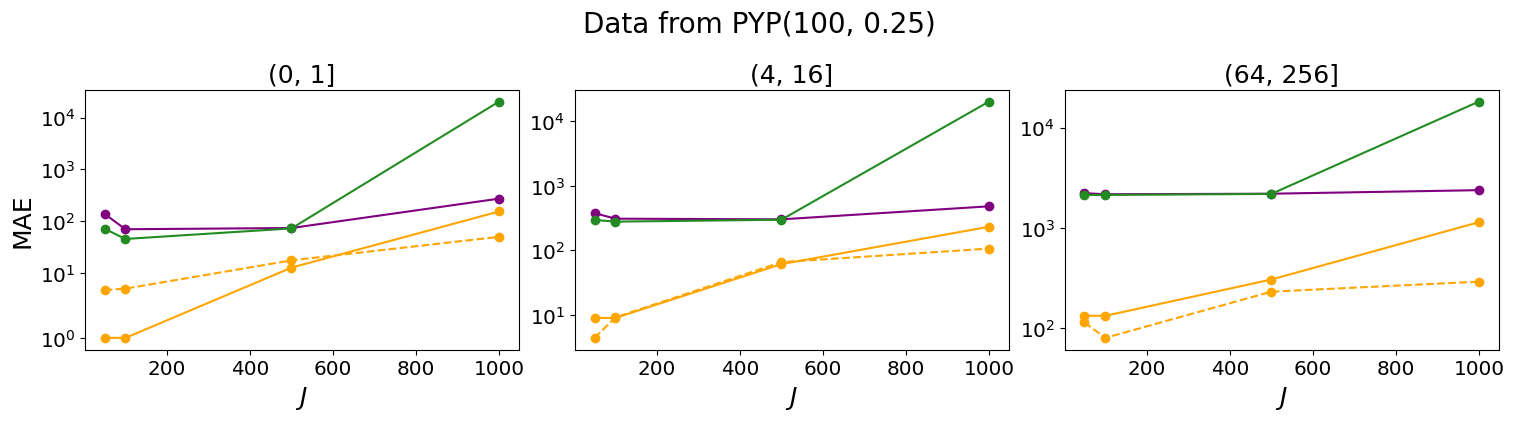

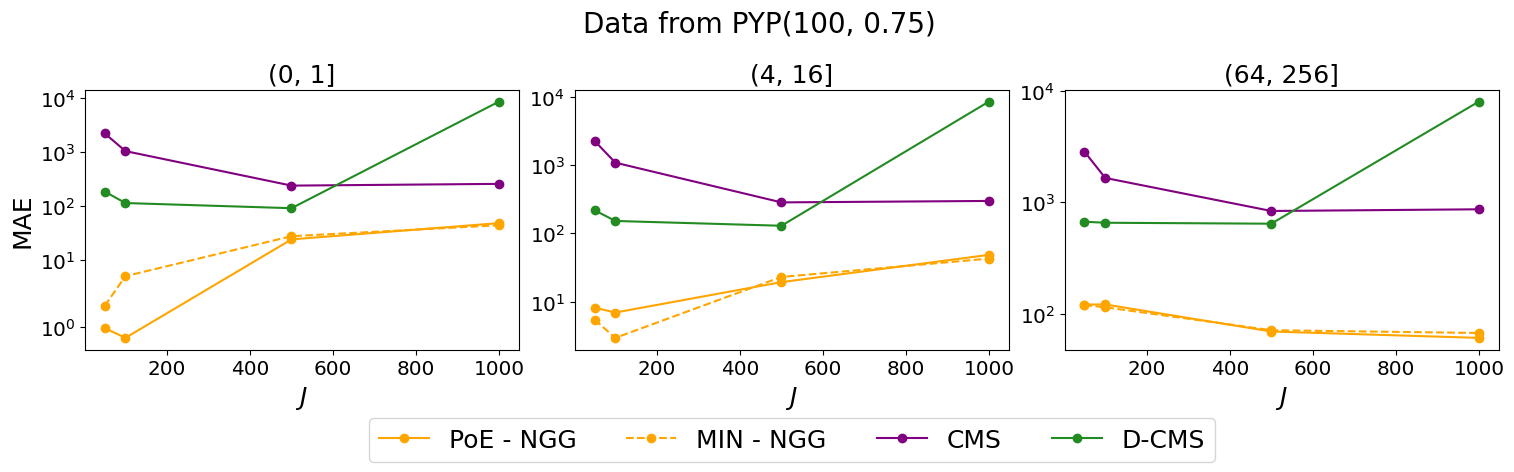

In [33]:
paramslist = [
    "[100.0, 0.25]",
    "[100.0, 0.75]"
]

models = ["NGG"]
colors = ["orange", "steelblue"]
# params = "[100.0, 0.25]"

kept_cols = [0, 2, 4]


for pnum, params in enumerate(paramslist):
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))
    
    subdf = df[df.Params == params]
    for i, col_idx in enumerate(kept_cols):
        poe_df = subdf[subdf.Rule == "PoE"]
        for mod, col in zip(models, colors):
            currdf = poe_df[poe_df.Model == mod]
            axis[i].plot(currdf.J, currdf[currdf.columns[col_idx + 5]], "-o", color=col, label="PoE - {0}".format(mod))

        min_df = subdf[subdf.Rule == "MIN"]
        for mod, col in zip(models, colors):
            currdf = min_df[min_df.Model == mod]
            axis[i].plot(currdf.J, currdf[currdf.columns[col_idx + 5]], "--o", color=col, label="MIN - {0}".format(mod))

        cms_df = subdf[subdf.Rule == "CMS"]
        axis[i].plot(cms_df.J, cms_df[cms_df.columns[col_idx + 5]], "-o", label="CMS", color="purple")
        # axis[i].set_ylim(None, cms_df[cms_df.columns[col_idx + 5]].max() * 1.1)


        cms_df = subdf[subdf.Rule == "D-CMS"]
        axis[i].plot(cms_df.J, cms_df[cms_df.columns[col_idx + 5]], "-o", label="D-CMS", color="forestgreen")

        #axis[i].plot(min_df.J, min_df[min_df.columns[i+4]], label="MIN")
        #axis[i].set_xlim(0, 1100)
        #axis[i].set_xticks(min_df.J)
        axis[i].set_title(min_df.columns[col_idx + 5], fontsize=18)
        axis[i].set_xlabel(r"$J$", fontsize=18)
        axis[i].set_yscale("symlog")

        
    axis[0].set_ylabel("MAE", fontsize=18)
    plt.tight_layout(pad=0.05)

    if pnum == 0:
        plt.suptitle("Data from PYP(100, 0.25)", fontsize=20, y=1.15)
    
    if pnum == 1:
        plt.suptitle("Data from PYP(100, 0.75)", fontsize=20, y=1.15)
        axis[1].legend(loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.48), fontsize=18)
    # plt.savefig("../plots/fig3_{0}.pdf".format(pnum + 1), bbox_inches="tight")

In [ ]:
# Tables 4 - 5 

In [35]:
np.unique(df["J"])

array([  50,  100,  500, 1000])

In [36]:
med_df = pd.concat([df_min, df_prod, df_cms, df_debiased])
med_df = med_df.groupby(["DataGen", "Params", "J", "Model", "Rule"]).median().reset_index()
med_df["theta"] = [x[0] for x in med_df.Params.apply(json.loads)]
med_df["alpha"] = [x[1] for x in med_df.Params.apply(json.loads)]
med_df = med_df.drop(["DataGen", "repnum", "Params"], axis=1)
columns = ["theta", "alpha", "J", "Model", "Rule", "(0, 1]", "(1, 4]", "(4, 16]", "(16, 64]",
           "(64, 256]", "(256, Inf]"]

for J in [  50,  100,  500, 1000]:
    print("TABLE FOR J = {0}".format(J))
    print(med_df[med_df.J == J][columns].to_latex(index=False, float_format="%.2f"))
    print("\n\n\n\n\n")

TABLE FOR J = 50
\begin{tabular}{rrrllrrrrrr}
\toprule
  theta &  alpha &  J & Model &  Rule &  (0, 1] &  (1, 4] &  (4, 16] &  (16, 64] &  (64, 256] &  (256, Inf] \\
\midrule
  10.00 &   0.25 & 50 &   CMS &   CMS &   45.04 &  101.22 &   375.80 &    980.86 &    3277.48 &    14945.69 \\
  10.00 &   0.25 & 50 & D-CMS & D-CMS &   45.04 &  101.22 &   375.80 &    980.86 &    3277.48 &    14945.69 \\
  10.00 &   0.25 & 50 &    DP &   MIN &   18.67 &   43.76 &   129.42 &    387.30 &    1001.78 &     4944.18 \\
  10.00 &   0.25 & 50 &    DP &   PoE &   41.25 &   97.07 &   343.93 &   1083.98 &    3320.18 &    14995.98 \\
  10.00 &   0.25 & 50 &   NGG &   MIN &    0.88 &    2.37 &    14.11 &     56.02 &     202.01 &     3096.35 \\
  10.00 &   0.25 & 50 &   NGG &   PoE &    1.00 &    2.69 &     8.96 &     34.12 &     131.95 &     3664.00 \\
  10.00 &   0.75 & 50 &   CMS &   CMS & 1111.81 & 1128.69 &  1199.58 &   1437.59 &    2185.28 &     5240.75 \\
  10.00 &   0.75 & 50 & D-CMS & D-CMS &  112.42 

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/2129774714.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(med_df[med_df.J == J][columns].to_latex(index=False, float_format="%.2f"))
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/2129774714.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(med_df[med_df.J == J][columns].to_latex(index=False, float_format="%.2f"))
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel

# Simulation 3 (Section 5.4)

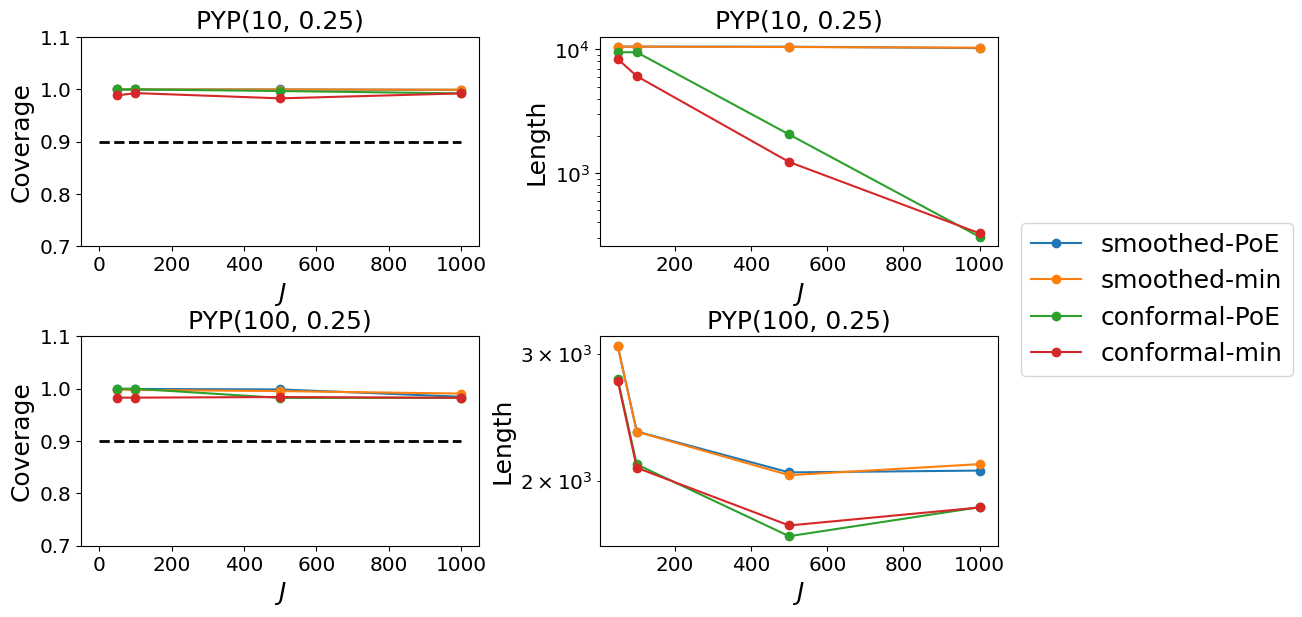

In [38]:
folder = "../results/"
base_name = "cms_PYP_{0:.1f}_{1:.2f}_d{2}_w{3}_n250000_s20230810_{4}_{5}_{6}_0.9_ts0.txt"

base_fname = folder + base_name

PY_ALPHAS = [0.25]
PY_THETAS = [10.0, 100.0]
Js = [50, 100, 500, 1000]
methods = ["bayes", "conformal"]
models = ["DP", "NGG"]
rules = ["PoE", "min"]


# NGG

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axis = axis.flat

# DATA From PYP (10, 0.25)
alpha = 0.25
theta = 10.0

model = "NGG"
for method in methods:
    for rule in rules:
        coverage = []
        length = []
        for j in Js:
            m = int(1000 / j)
            fname = base_fname.format(theta, alpha, m, j, method, rule, model)
            df = pd.read_csv(fname)
            coverage.append(df.coverage.values[0])
            length.append(df.length.values[0])
            
        axis[0].plot(Js, coverage, "-o", label="{0}-{1}".format(method, rule))
        axis[1].plot(Js, length, "-o")
        

# DATA From PYP (100, 0.25)
theta = 100.0

label = ["smoothed", "conformal"]

for k, method in enumerate(["bayes", "conformal"]):
    for rule in rules:
        coverage = []
        length = []
        for j in Js:
            m = int(1000 / j)
            try:
                fname = base_fname.format(theta, alpha, m, j, method, rule, model)
                df = pd.read_csv(fname)
                coverage.append(df.coverage.values[0])
                length.append(df.length.values[0])
            except Exception as e:
                print(e)
            
        axis[2].plot(Js[:len(coverage)], coverage, "-o", label="{0}-{1}".format(label[k], rule))
        axis[3].plot(Js[:len(length)], length, "-o", label="{0}-{1}".format(label[k], rule))

axis[0].set_ylim(0.7, 1.1)
axis[2].set_ylim(0.7, 1.1)
axis[0].hlines(0.9, 0, 1000, linestyle="--", color="black", lw=2)
axis[2].hlines(0.9, 0, 1000, linestyle="--", color="black", lw=2)

axis[1].set_yscale("log")
axis[3].set_yscale("log")


axis[0].set_title("PYP(10, 0.25)", fontsize=18)
axis[0].set_ylabel("Coverage", fontsize=18)
axis[1].set_title("PYP(10, 0.25)", fontsize=18)
axis[1].set_ylabel("Length", fontsize=18)

axis[2].set_title("PYP(100, 0.25)", fontsize=18)
axis[2].set_ylabel("Coverage", fontsize=18)
axis[3].set_title("PYP(100, 0.25)", fontsize=18)
axis[3].set_ylabel("Length", fontsize=18)


for i in range(4):
    axis[i].set_xlabel(r"$J$", fontsize=18)

plt.tight_layout(pad=0.1)

axis[3].legend(loc="lower center", ncol=1, bbox_to_anchor=(1.4,0.75), fontsize=18)

# plt.suptitle("NGG Smoothing", fontsize=22, y=1.15)
# plt.savefig("conformal_ngg.pdf", bbox_inches="tight")

# Bigram Data 

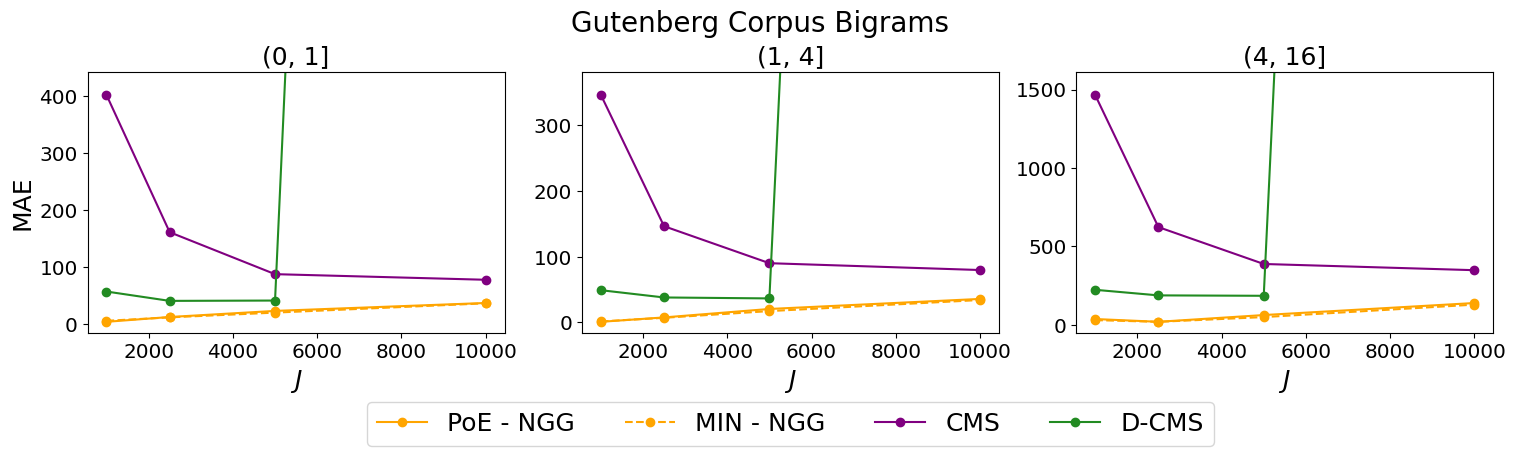

In [39]:
df = pd.read_csv("../results/bigram_maes.csv")

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

models = ["NGG"]

colors = ["orange", "steelblue",]
kept_cols = [0, 2, 4]

for i, col_idx in enumerate(kept_cols):
    poe_df = df[df.Rule == "PoE"]
    for mod, col in zip(models, colors):
        currdf = poe_df[poe_df.Model == mod]
        axis[i].plot(currdf.J, currdf[currdf.columns[i]], "-o", color=col, label="PoE - {0}".format(mod))
    
    min_df = df[df.Rule == "MIN"]
    for mod, col in zip(models, colors):
        currdf = min_df[min_df.Model == mod]
        axis[i].plot(currdf.J, currdf[currdf.columns[i]], "--o", color=col, label="MIN - {0}".format(mod))
        
    cms_df = df[df.Rule == "CMS"]
    axis[i].plot(cms_df.J, cms_df[cms_df.columns[i]], "-o", label="CMS", color="purple")
    axis[i].set_ylim((None, cms_df[cms_df.columns[i]].max() * 1.1))

    dcms_df = df[df.Rule == "D-CMS"]
    axis[i].plot(dcms_df.J, dcms_df[dcms_df.columns[i]], "-o", label="D-CMS", color="forestgreen")

   
        
    #axis[i].plot(min_df.J, min_df[min_df.columns[i+4]], label="MIN")
    #axis[i].set_xlim(0, 1100)
    #axis[i].set_xticks(min_df.J)
    axis[i].set_title(min_df.columns[i], fontsize=18)
    axis[i].set_xlabel(r"$J$", fontsize=18)

axis[0].set_ylabel("MAE", fontsize=18)
plt.tight_layout(pad=.01)

axis[1].legend(loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.48), fontsize=18)
plt.suptitle("Gutenberg Corpus Bigrams", fontsize=20, y=1.1)
# plt.savefig("../plots/bigrams_freq.pdf", bbox_inches="tight")

plt.show()

# DNA Data

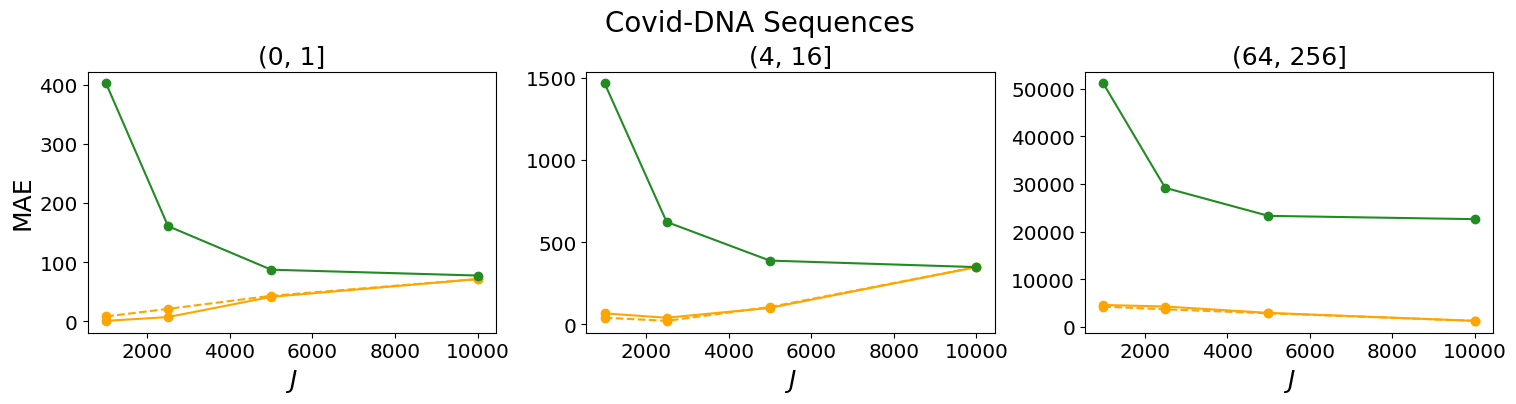

In [41]:
df = pd.read_csv("../results/dna_maes.csv")

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15,3.5))

models = ["NGG"]

colors = ["orange"]

ketp_cols = [0, 2, 4]

poe_df = df[df.Rule == "PoE"]
for mod, col in zip(models, colors):
    currdf = poe_df[poe_df.Model == mod]
    for i, col_idx in enumerate(kept_cols):
        axis[i].plot(currdf.J, currdf[currdf.columns[col_idx]], "-o", color=col, label="PoE - {0}".format(mod))
        axis[i].set_title(currdf.columns[col_idx], fontsize=18)

min_df = df[df.Rule == "MIN"]
for mod, col in zip(models, colors):
    currdf = min_df[min_df.Model == mod]
    for i, col_idx in enumerate(kept_cols):
        axis[i].plot(currdf.J, currdf[currdf.columns[col_idx]], "--o", color=col, label="MIN - {0}".format(mod))
        
# cms_df = df[df.Rule == "CMS"]
# for i, col_idx in enumerate(kept_cols):
#     axis[i].plot(cms_df.J, cms_df[cms_df.columns[col_idx]], label="CMS", color="purple")
#     axis[i].set_xticks(min_df.J)

dcms_df = df[df.Rule == "D-CMS"]
for i, col_idx in enumerate(kept_cols):
   axis[i].plot(dcms_df.J, cms_df[dcms_df.columns[col_idx]], "-o", label="D-CMS", color="forestgreen")
    
for i, col_idx in enumerate(kept_cols):
    axis[i].set_xlabel(r"$J$", fontsize=18)
    
axis[0].set_ylabel("MAE", fontsize=18)
plt.tight_layout(pad=0.01)

# axis[1].legend(loc="lower center", ncol=5, bbox_to_anchor=(0.5,-0.48), fontsize=18)
plt.suptitle("Covid-DNA Sequences", fontsize=20, y=1.1)
# plt.savefig("../plots/dna_freq.pdf", bbox_inches="tight")

plt.show()

# APPENDIX

##  Cardinality 1 Hash (Figure A2)

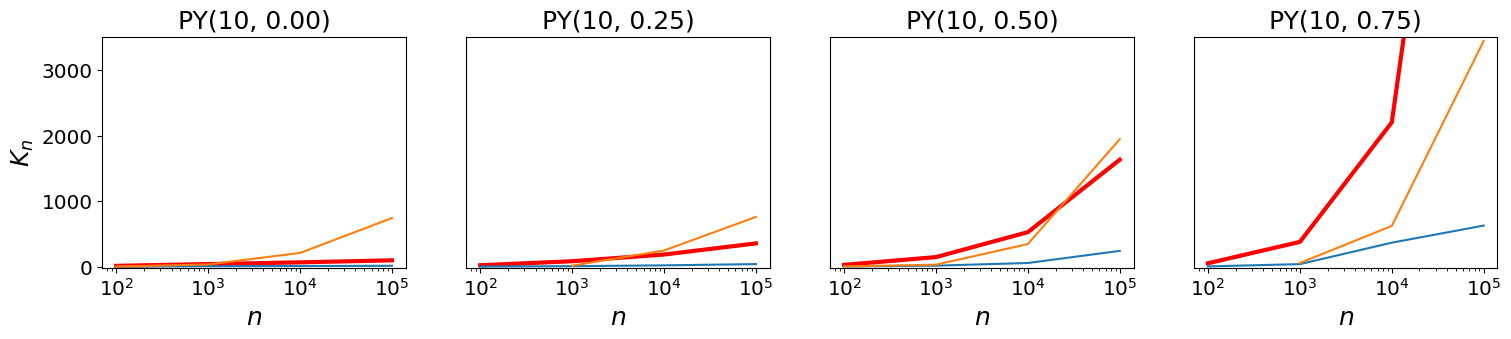

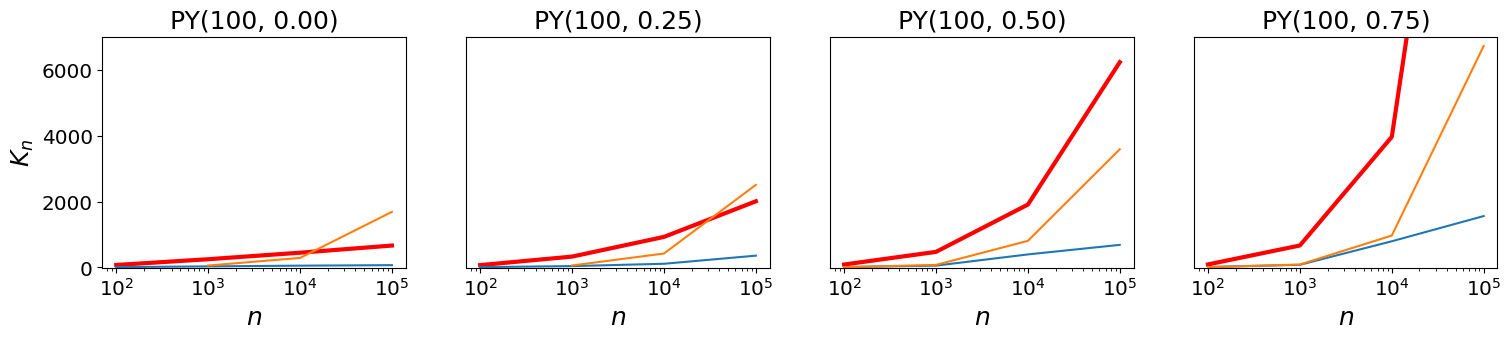

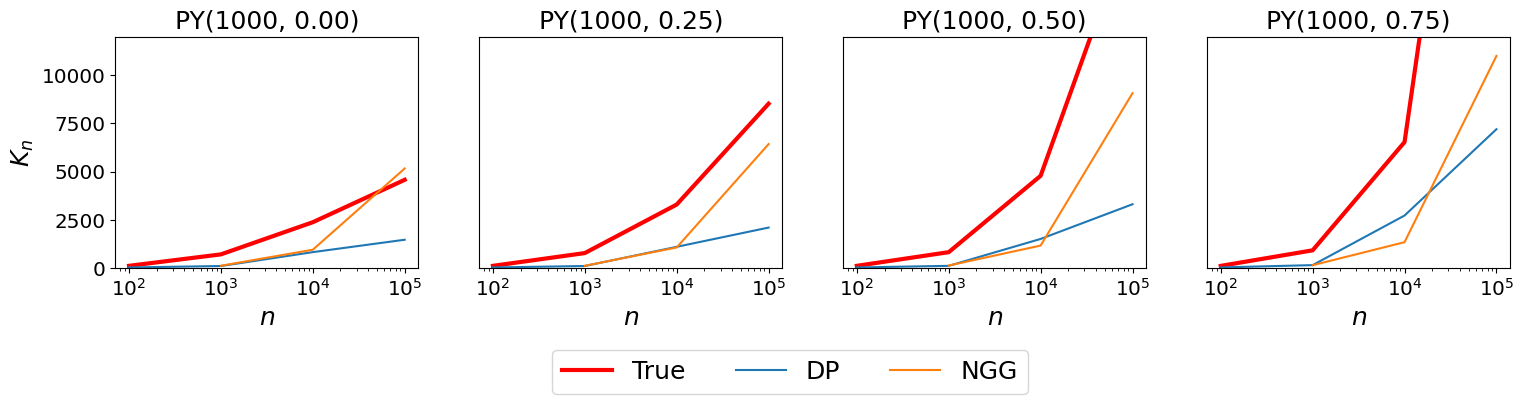

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

df = pd.read_csv("../results/card_plot_df.csv")
df["theta"] = [x[0] for x in df.Params.apply(json.loads)]
df["alpha"] = [x[1] for x in df.Params.apply(json.loads)]

# df.loc[df.isna()["NGG"], "NGG"] = df[df.isna()["NGG"]]["DP"]


ndata = [100, 1000, 10000, 100000]
alphas = [0.0, 0.25, 0.5, 0.75]
thetas = [10.0, 100.0, 1000.0]

for i, t in enumerate(thetas):
    fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
    
    for j, a in enumerate(alphas):
        curr_df = df[(df.theta == t) & (df.alpha == a)]        
        axis[j].plot(ndata, curr_df.TrueK, color="red", lw=3, label="True")
        axis[j].plot(ndata, curr_df.DP, label="DP")
        axis[j].plot(ndata, curr_df.NGG, label="NGG")
        
        if i == 0:
            axis[j].set_ylim(-10, 3500)
        elif i == 1:
            axis[j].set_ylim(-10, 7000)
        elif i == 2:
            axis[j].set_ylim(-10, 12000)
 
        axis[j].set_xscale("log")    
        axis[j].set_title("PY({0:.0f}, {1:.2f})".format(t, a), fontsize=18)

        
    axis[0].set_ylabel(r"$K_n$", fontsize=18)
    for j in range(4):
        axis[j].set_xlabel("$n$", fontsize=18)
    
    for j in range(1, 4):
        axis[j].set_yticks([])
        
    if i == 2:
        axis[2].legend(loc="lower left", ncol=4, bbox_to_anchor=(-1, -0.6), fontsize=18)
        

    # plt.savefig("../plots/card_py_theta{0}.pdf".format(t), bbox_inches="tight")
plt.show()

## Table 2

In [44]:
df = pd.read_csv("../results/card_simulation_results.csv")
df = df[df.Model.isin(["DP", "NGG"])]
med_df = df[df.DataGen == "py"].groupby(["DataGen", "Params", "Model"]).median().reset_index()
med_df["theta"] = [x[0] for x in med_df.Params.apply(json.loads)]
med_df["alpha"] = [x[1] for x in med_df.Params.apply(json.loads)]
med_df = med_df.drop(["DataGen", "repnum", "Params"], axis=1)
columns = ["theta", "alpha", "Model", "100", "1000", "10000", "100000"]
print(med_df[columns].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrlrrrr}
\toprule
  theta &  alpha & Model &   100 &   1000 &   10000 &   100000 \\
\midrule
   1.00 &   0.00 &    DP &  1.07 &   0.97 &    0.86 &     1.84 \\
   1.00 &   0.00 &   NGG &  0.96 &  28.61 &   80.25 &    43.36 \\
   1.00 &   0.25 &    DP &  2.47 &  17.01 &   35.29 &    67.68 \\
   1.00 &   0.25 &   NGG &  2.19 &  20.72 &  189.59 &   610.90 \\
   1.00 &   0.50 &    DP & 12.12 &  43.50 &  160.44 &   506.53 \\
   1.00 &   0.50 &   NGG &  2.79 &  22.26 &   60.13 &   348.61 \\
   1.00 &   0.75 &    DP & 38.78 & 263.71 & 1433.17 &  9158.79 \\
   1.00 &   0.75 &   NGG & 28.46 & 249.30 & 1204.08 &  6608.67 \\
  10.00 &   0.00 &    DP & 13.06 &  33.21 &   56.90 &    75.58 \\
  10.00 &   0.00 &   NGG & 11.56 &   7.87 &  184.96 &   798.94 \\
  10.00 &   0.25 &    DP & 27.71 &  83.23 &  185.06 &   349.92 \\
  10.00 &   0.25 &   NGG & 28.05 &  71.80 &   89.69 &   908.58 \\
  10.00 &   0.50 &    DP & 27.64 & 130.49 &  445.35 &  1392.30 \\
  10.00 &   0.50 &   NGG & 24.96 

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/592605540.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(med_df[columns].to_latex(index=False, float_format="%.2f"))


## Table 3

In [47]:
df = pd.read_csv("../results/zipf_card_simulation_results.csv")

med_df = df[df.DataGen == "zipf"].groupby(["DataGen", "Params", "Model"]).median().reset_index()
# med_df["c"] = [x for x in med_df.Params.apply(json.loads)]
# med_df.c = med_df.Params
med_df = med_df.drop(["DataGen", "repnum"], axis=1)
columns = ["Params", "Model", "100", "1000", "10000", "100000"]
print(med_df[columns].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rlrrrr}
\toprule
 Params & Model &   100 &   1000 &   10000 &  100000 \\
\midrule
   1.30 &    DP & 36.14 & 244.64 & 1377.48 & 9203.69 \\
   1.30 &   NGG &   NaN & 236.01 & 1193.71 & 6623.06 \\
   1.60 &    DP & 16.81 &  90.53 &  404.33 & 1645.03 \\
   1.60 &   NGG &   NaN &  55.57 &  141.33 &  295.76 \\
   1.90 &    DP &  7.49 &  40.03 &  152.04 &  540.63 \\
   1.90 &   NGG &  4.34 &   5.68 &   87.70 &  455.90 \\
   2.20 &    DP &  3.34 &  20.99 &   71.63 &  224.75 \\
   2.20 &   NGG &  3.96 &  15.86 &  133.26 &  553.39 \\
\bottomrule
\end{tabular}



/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30054/686162763.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(med_df[columns].to_latex(index=False, float_format="%.2f"))


##  Role of J (Appendix A5.2)

In [ ]:
df = pd.read_csv("../results/jeffect_freq_simulation_results.csv")
# med_df = df.groupby(["Params", "Model", "J"]).median().reset_index()
med_df = df.iloc[range(8, 16)]

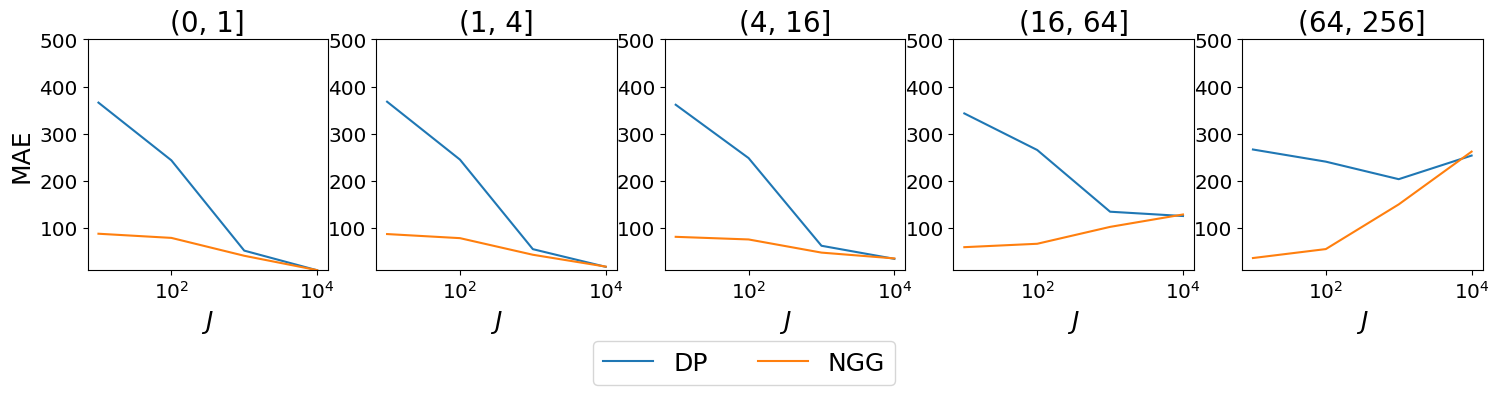

In [48]:
df = pd.read_csv("../results/jeffect_freq_simulation_results.csv")
# med_df = df.groupby(["Params", "Model", "J"]).median().reset_index()
med_df = df.iloc[range(16, 32)]


theta = 100
alpha = 0.75
params = "[{0:.1f}, {1:.2f}]".format(theta, alpha)
 
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(18, 3))

curr_df = med_df[med_df.Params == params]
for model in ["DP", "NGG"]:
    mdf = curr_df[curr_df["Model"] == model]
    for i in range(5):
        axis[i].plot(mdf.J, mdf[mdf.columns[i]], label=model)
        axis[i].set_title(mdf.columns[i], fontsize=20)
        axis[i].set_ylim(10, 500)
        # axis[i].set_yscale("log")
        axis[i].set_xscale("log")

for i in range(5):
    axis[i].set_xlabel(r"$J$", fontsize=18)
axis[0].set_ylabel("MAE", fontsize=18)
        
axis[2].legend(ncol=3, loc="lower left", bbox_to_anchor=(-0.35, -0.55), fontsize=18)
# plt.savefig("../plots/maes_jeffect_alpha_{0:.2f}.pdf".format(alpha), bbox_inches="tight")

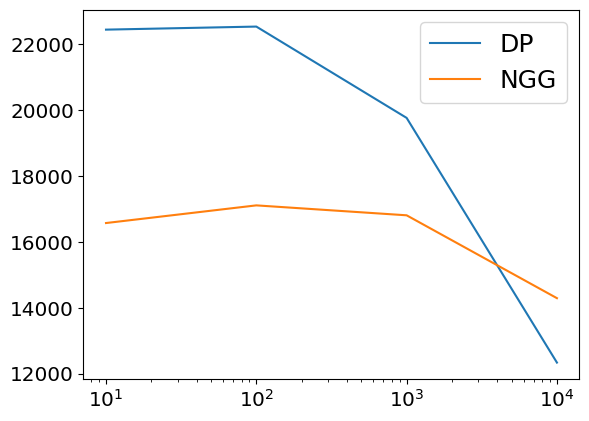

In [50]:
df = pd.read_csv("../results/jeffect_card_simulation_results.csv")
med_df = df.groupby(["Params", "Model"]).median().reset_index()


theta = 100
alpha = 0.75
params = "[{0:.1f}, {1:.2f}]".format(theta, alpha)

Js = [10, 100, 1000, 10000]
 
curr_df = med_df[med_df.Params == params]
for model in ["DP", "NGG"]:
    plt.plot(Js, curr_df[curr_df.Model == model].values[0, 2:], label=model)
    
plt.xscale("log")
plt.legend(fontsize=18)
    
        
# axis[2].legend(ncol=3, loc="lower left", bbox_to_anchor=(-0.35, -0.4), fontsize=18)
# plt.savefig("../plots/card_jeffect_alpha_{0:.2f}.pdf".format(alpha), bbox_inches="tight")